# Decreased MC O/H Condensor Efficiency

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams.update({'font.size': 12})

In [2]:
df = pd.read_excel('columns.xlsx')
col = df['Symbol'].values
col = col.tolist()

In [3]:
df_stableFeedFlow = pd.read_csv(r'C:\Users\akpra\OneDrive\Desktop\Fluid-Catalytic-Cracking-Unit-Dataset-for-Process-Monitoring-Evaluation-main\NOC_stableFeedFlow_outputs.csv',header=None)
df_stableFeedFlow.set_index = df_stableFeedFlow.iloc[:,0]
df_stableFeedFlow = df_stableFeedFlow.drop(columns=0)
df_stableFeedFlow.columns= col
df_stableFeedFlow.sample(5)

F3    Tatm      T1    P4  deltaP  P6    Fair      T3      T2  \
2433  164.78  79.263  460.55  34.4    -6.4  28  2.6783  1564.9  616.01   
1115  164.98  78.519  460.30  34.4    -6.4  28  2.6788  1567.6  616.00   
2137  164.97  80.012  461.08  34.4    -6.4  28  2.6765  1562.8  616.00   
946   164.86  79.483  460.59  34.4    -6.4  28  2.6787  1565.1  616.00   
1800  165.05  78.826  460.61  34.4    -6.4  28  2.6792  1566.1  616.00   

          Tr  ...    FLCO  FSlurry  FReflux    Tfra     T10     T20      V9  \
2433  969.01  ...  1648.9   213.23   2982.3  314.09  509.71  627.96  46.777   
1115  968.98  ...  1639.8   216.04   2977.3  313.59  509.76  628.11  47.465   
2137  968.94  ...  1636.4   219.44   2976.9  314.57  509.58  627.96  46.215   
946   969.01  ...  1634.9   217.02   2969.3  314.08  509.61  627.87  46.785   
1800  968.96  ...  1645.3   218.94   3007.6  314.31  509.94  628.46  46.651   

          V8     V10     V11  
2433  49.557  49.917  47.533  
1115  49.560  49.266  47.006  
2137  49.386  49.778  46.827  
946   49.343  48.786  46.740  
1800  49.944  50.187  47.300  

[5 rows x 46 columns]

In [4]:
df_varyingFeedFlow=pd.read_csv(r'C:\Users\akpra\OneDrive\Desktop\Fluid-Catalytic-Cracking-Unit-Dataset-for-Process-Monitoring-Evaluation-main\NOC_varyingFeedFlow_outputs.csv',header=None)
df_varyingFeedFlow.set_index = df_varyingFeedFlow.iloc[:,0]
df_varyingFeedFlow = df_varyingFeedFlow.drop(columns=0)
df_varyingFeedFlow.columns= col
df_varyingFeedFlow.sample(5)

F3    Tatm      T1    P4  deltaP  P6    Fair      T3      T2  \
198   165.15  77.418  460.72  34.4    -6.4  28  2.6817  1566.1  616.00   
3622  163.27  80.030  460.61  34.4    -6.4  28  2.6512  1555.1  615.99   
5724  162.74  75.492  460.05  34.4    -6.4  28  2.6450  1555.2  616.01   
5931  162.73  77.120  460.47  34.4    -6.4  28  2.6443  1552.6  616.00   
2377  164.48  79.511  461.09  34.4    -6.4  28  2.6729  1559.7  616.01   

          Tr  ...    FLCO  FSlurry  FReflux    Tfra     T10     T20      V9  \
198   968.99  ...  1639.0   211.46   2961.3  312.49  509.76  627.98  48.685   
3622  968.98  ...  1608.8   225.44   2729.9  310.03  507.39  624.61  50.657   
5724  969.02  ...  1604.4   223.62   2617.2  304.83  506.73  623.59  57.398   
5931  969.01  ...  1599.5   227.10   2633.8  306.23  506.75  623.66  55.348   
2377  968.99  ...  1635.7   234.91   2997.1  314.82  509.68  628.42  46.175   

          V8     V10     V11  
198   49.485  48.669  46.962  
3622  46.004  47.813  45.478  
5724  44.963  47.107  45.287  
5931  45.009  46.974  45.014  
2377  49.676  51.122  46.772  

[5 rows x 46 columns]

In [5]:
df_condEff_decrease = pd.read_csv(r'C:\Users\akpra\OneDrive\Desktop\Fluid-Catalytic-Cracking-Unit-Dataset-for-Process-Monitoring-Evaluation-main\condEff_decrease_outputs.csv',header=None)
df_condEff_decrease.set_index = df_condEff_decrease.iloc[:,0]
df_condEff_decrease = df_condEff_decrease.drop(columns=0)
df_condEff_decrease.columns= col
df_condEff_decrease.sample(5)

F3    Tatm      T1    P4  deltaP  P6    Fair      T3      T2  \
773   165.42  79.979  460.80  34.4    -6.4  28  2.6874  1567.3  616.00   
1196  164.99  77.878  461.05  34.4    -6.4  28  2.6818  1563.1  616.01   
52    165.01  75.668  461.18  34.4    -6.4  28  2.6823  1562.4  616.01   
470   165.17  79.405  460.97  34.4    -6.4  28  2.6826  1564.7  616.01   
942   165.14  79.575  460.96  34.4    -6.4  28  2.6831  1564.6  616.00   

          Tr  ...    FLCO  FSlurry  FReflux    Tfra     T10     T20      V9  \
773   969.02  ...  1646.2   203.97   3119.9  322.03  510.09  628.27  37.785   
1196  969.03  ...  1635.9   213.14   3060.2  319.92  509.76  627.98  40.054   
52    969.04  ...  1636.1   211.96   2936.9  310.93  509.73  627.92  50.648   
470   969.00  ...  1647.4   208.81   3038.0  317.13  509.91  628.14  43.132   
942   969.02  ...  1645.7   206.63   3089.4  321.33  509.85  627.96  38.478   

          V8     V10     V11  
773   50.528  49.130  47.348  
1196  49.886  48.966  46.789  
52    49.349  47.996  46.801  
470   49.977  49.450  47.431  
942   50.141  49.395  47.339  

[5 rows x 46 columns]

In [6]:
df_condEff_decrease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 46 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   F3           1440 non-null   float64
 1   Tatm         1440 non-null   float64
 2   T1           1440 non-null   float64
 3   P4           1440 non-null   float64
 4   deltaP       1440 non-null   float64
 5   P6           1440 non-null   int64  
 6   Fair         1440 non-null   float64
 7   T3           1440 non-null   float64
 8   T2           1440 non-null   float64
 9   Tr           1440 non-null   float64
 10  Treg         1440 non-null   float64
 11  Lsp          1440 non-null   float64
 12  Tcyc         1440 non-null   float64
 13  Tcyc - Treg  1440 non-null   float64
 14  Cco,sg       1440 non-null   int64  
 15  Co2,sg       1440 non-null   float64
 16  P5           1440 non-null   float64
 17  V4           1440 non-null   float64
 18  V6           1440 non-null   float64
 19  V7    

In [7]:
df_condEff_decrease.describe().T

count          mean           std           min           25%  \
F3           1440.0    164.964931  1.705031e-01    164.480000    164.840000   
Tatm         1440.0     78.342074  1.495206e+00     75.014000     77.206250   
T1           1440.0    460.921306  3.773500e-01    459.880000    460.660000   
P4           1440.0     34.400000  8.884870e-13     34.400000     34.400000   
deltaP       1440.0     -6.400001  1.366802e-05     -6.400300     -6.400000   
P6           1440.0     28.000000  0.000000e+00     28.000000     28.000000   
Fair         1440.0      2.679885  3.071531e-03      2.671800      2.677700   
T3           1440.0   1563.718958  2.493819e+00   1557.700000   1561.900000   
T2           1440.0    615.999910  6.663159e-03    615.980000    616.000000   
Tr           1440.0    968.999750  3.104291e-02    968.910000    968.980000   
Treg         1440.0   1250.001528  5.095774e-02   1249.900000   1250.000000   
Lsp          1440.0     29.653098  9.399890e-02     29.376000     29.586000   
Tcyc         1440.0   1255.278958  5.024220e-02   1255.200000   1255.200000   
Tcyc - Treg  1440.0      5.278488  3.785116e-02      5.186900      5.250175   
Cco,sg       1440.0  29881.611806  4.865322e+01  29737.000000  29846.000000   
Co2,sg       1440.0      0.012470  1.691557e-04      0.012067      0.012344   
P5           1440.0     24.900000  6.752501e-13     24.900000     24.900000   
V4           1440.0     47.584573  1.025714e+00     45.364000     46.808000   
V6           1440.0     24.783957  1.008147e-01     24.532000     24.708000   
V7           1440.0     54.577801  6.263411e-02     54.413000     54.534000   
V3           1440.0     46.982188  1.595010e-02     46.937000     46.971000   
V1           1440.0     57.909178  1.800725e-01     57.470000     57.778500   
V2           1440.0     45.315724  5.301285e-02     45.177000     45.283000   
Frgc         1440.0  49572.265972  6.081201e+01  49407.000000  49529.000000   
Fsc          1440.0  49572.208333  6.126321e+01  49411.000000  49529.000000   
ACAB         1440.0    280.687479  1.405453e+00    277.550000    279.710000   
AWGC         1440.0    213.537201  6.912833e+00    198.490000    208.370000   
F5           1440.0   1989.637292  6.187052e+00   1974.600000   1985.175000   
F7           1440.0   3735.766111  5.533026e+00   3722.500000   3731.800000   
Fsg          1440.0    160.793049  1.845840e-01    160.310000    160.660000   
FV11         1440.0  29078.619444  7.483565e+02  27433.000000  28523.000000   
P1           1440.0     14.637990  1.015644e-04     14.637000     14.638000   
P2           1440.0     35.044537  2.357305e-02     34.995000     35.026000   
FLPG         1440.0   3199.203681  1.250097e+02   2929.900000   3104.475000   
FLN          1440.0   3751.406806  1.255117e+02   3582.700000   3640.875000   
FHN          1440.0    711.221708  4.431817e+00    698.640000    708.587500   
FLCO         1440.0   1642.687292  4.569204e+00   1630.300000   1639.400000   
FSlurry      1440.0    214.302257  4.559766e+00    201.700000    210.787500   
FReflux      1440.0   3038.856389  4.980395e+01   2923.500000   2999.575000   
Tfra         1440.0    317.874403  3.343519e+00    310.700000    315.350000   
T10          1440.0    509.777910  1.371906e-01    509.380000    509.680000   
T20          1440.0    628.078812  1.482168e-01    627.680000    627.990000   
V9           1440.0     42.438248  3.860931e+00     37.629000     39.092250   
V8           1440.0     49.872215  3.110262e-01     49.160000     49.666000   
V10          1440.0     49.723878  6.232966e-01     47.978000     49.351750   
V11          1440.0     47.170649  2.520129e-01     46.496000     46.984000   

                      50%           75%           max  
F3             164.970000    165.080000    165.520000  
Tatm            78.782000     79.699250     80.057000  
T1             460.910000    461.190000    461.930000  
P4              34.400000     34.400000     34.400000  
deltaP          -6.4

<AxesSubplot:>

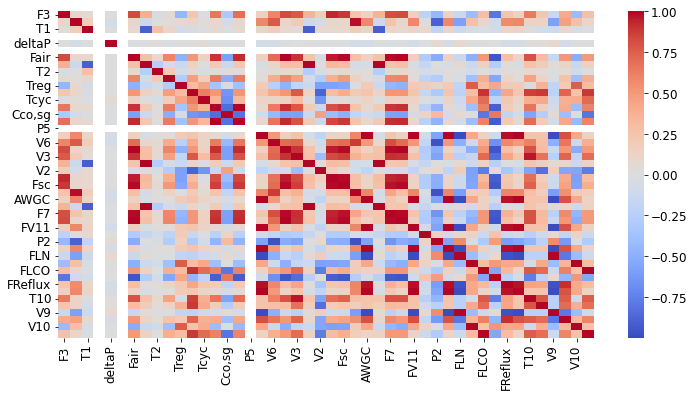

In [8]:
sns.heatmap(df_condEff_decrease.corr(),cmap='coolwarm')

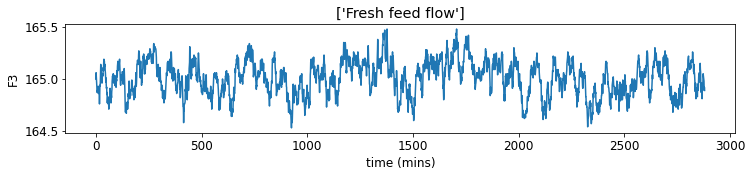

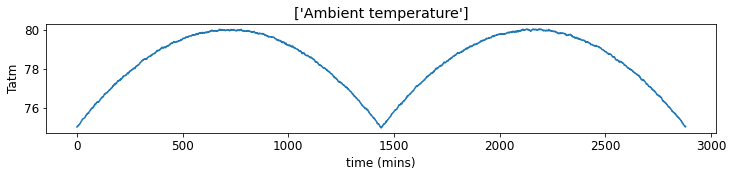

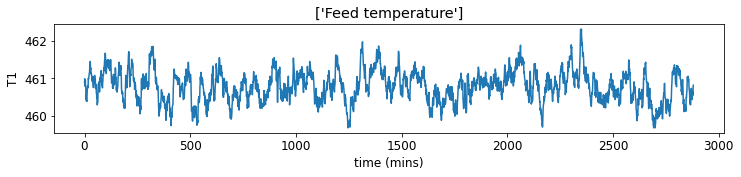

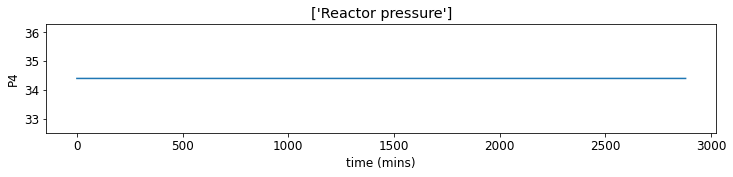

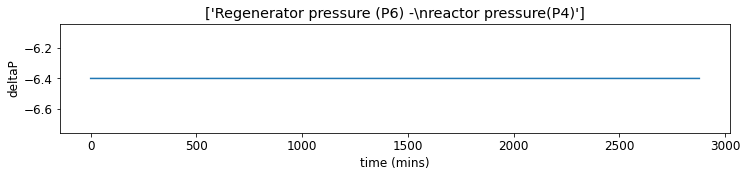

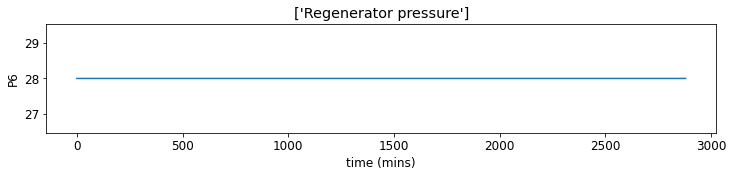

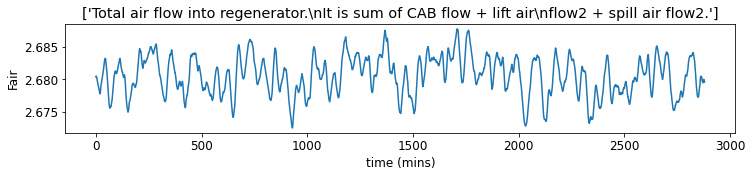

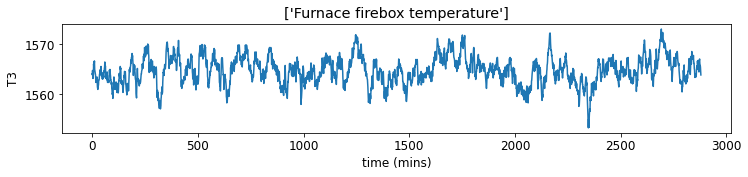

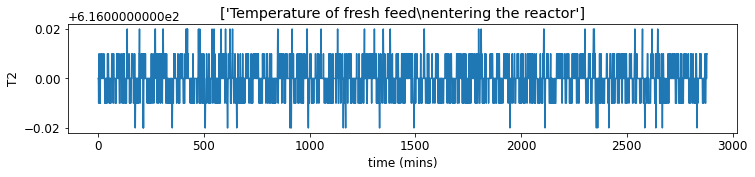

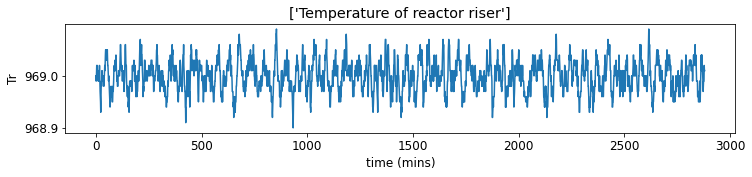

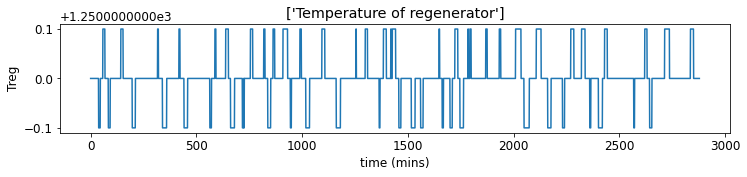

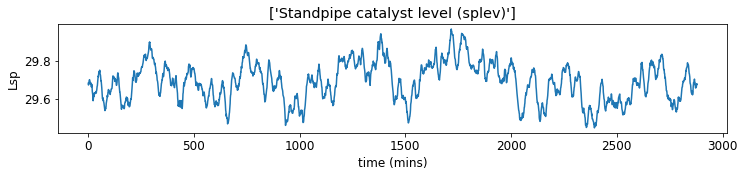

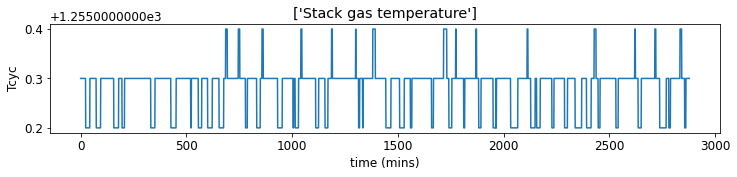

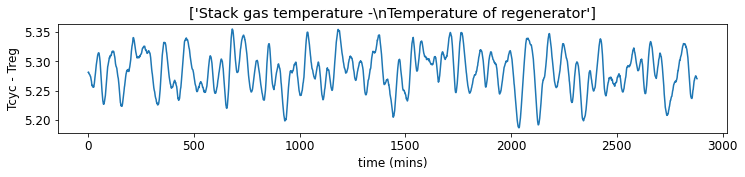

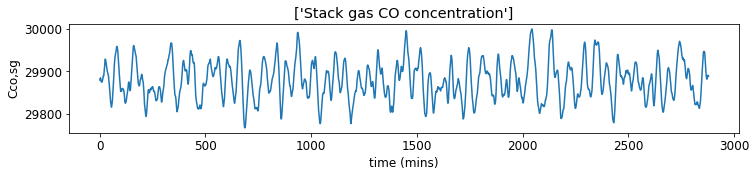

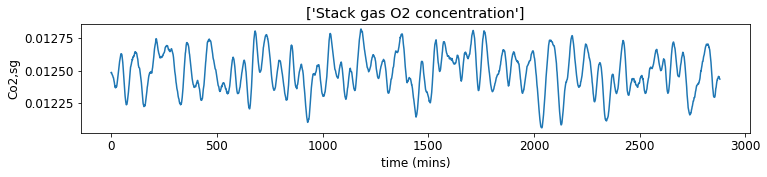

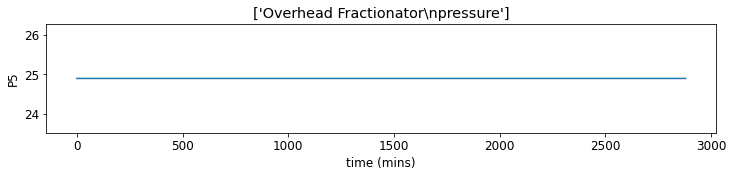

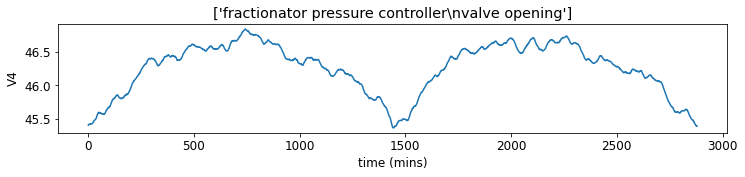

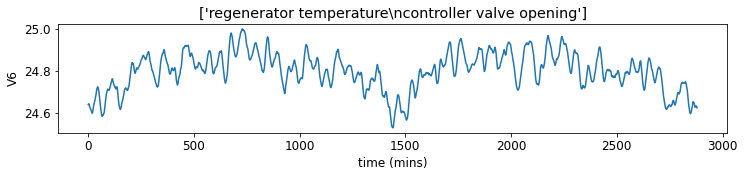

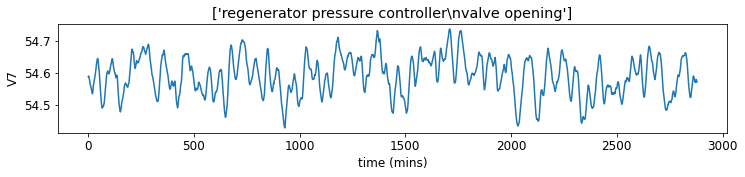

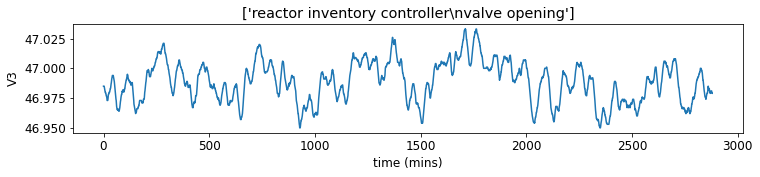

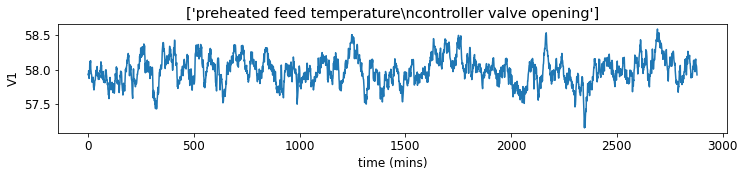

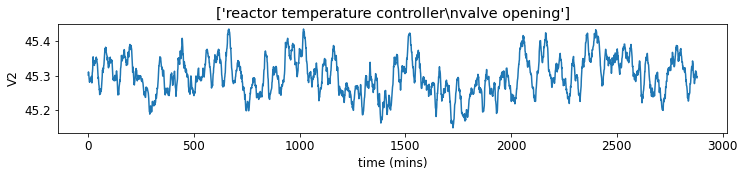

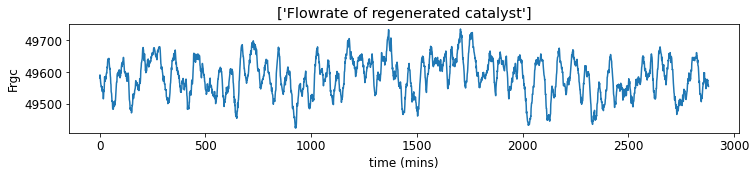

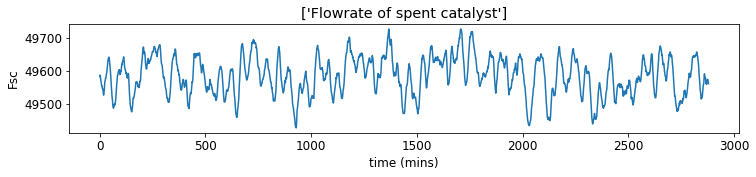

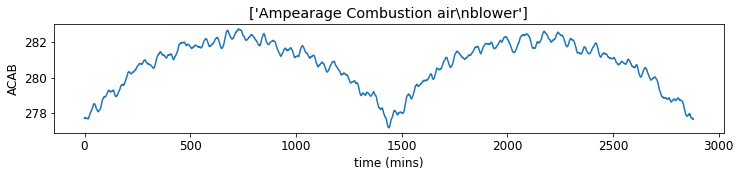

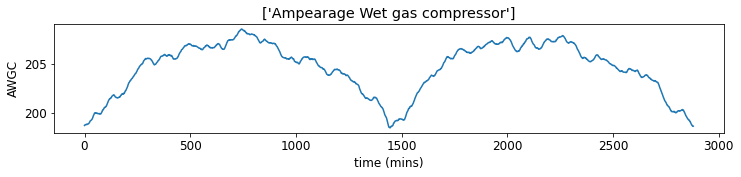

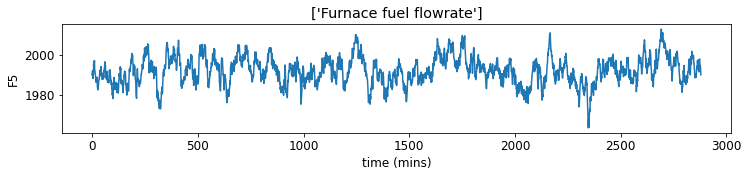

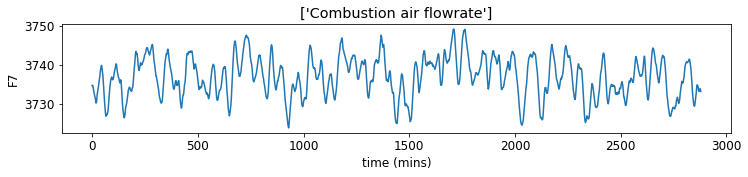

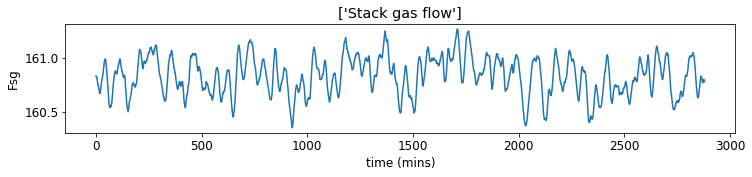

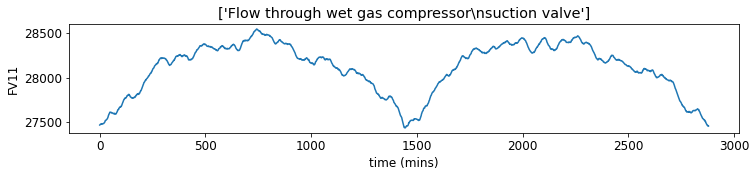

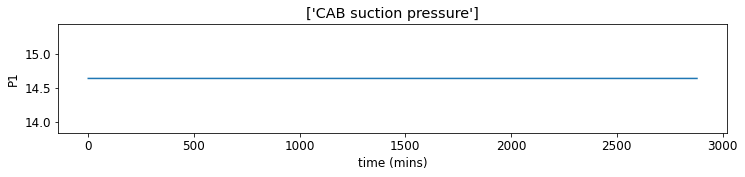

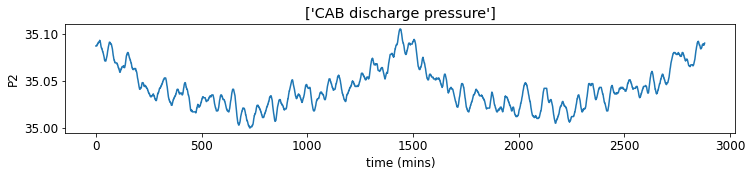

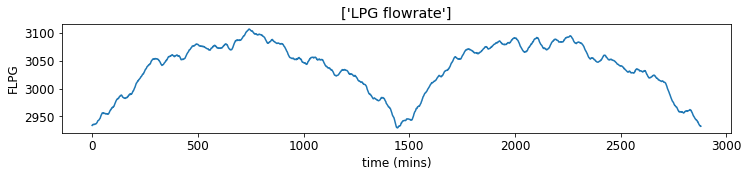

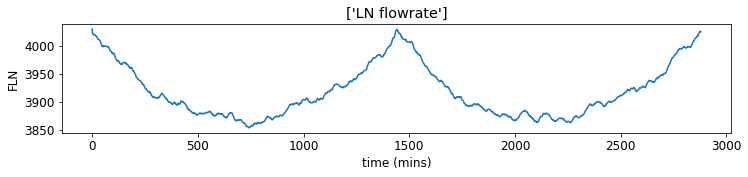

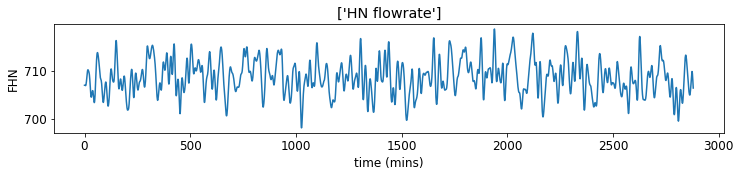

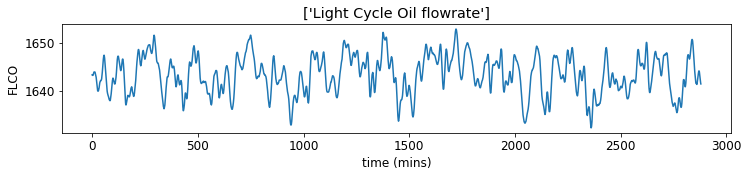

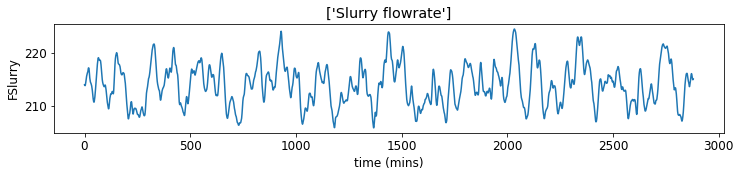

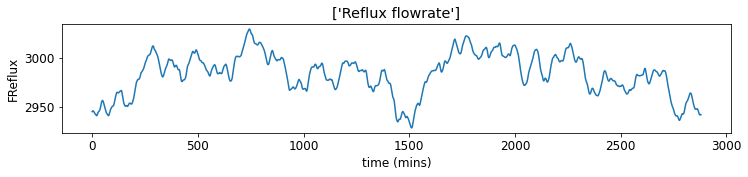

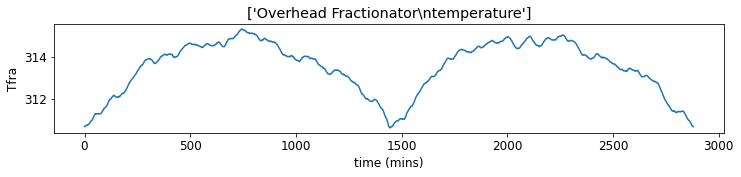

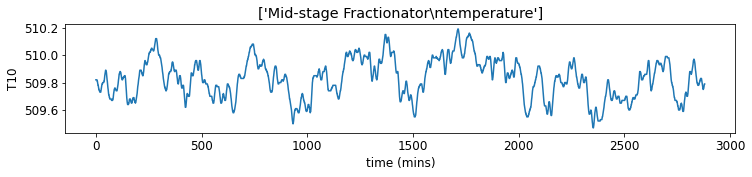

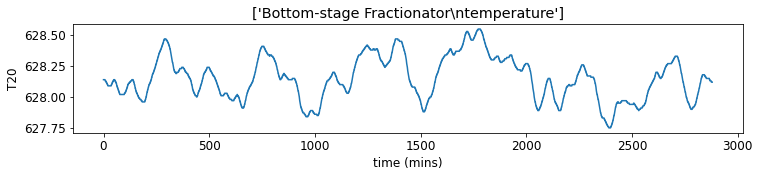

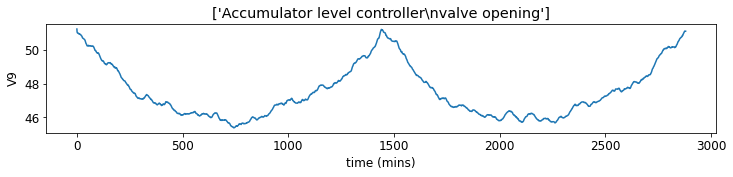

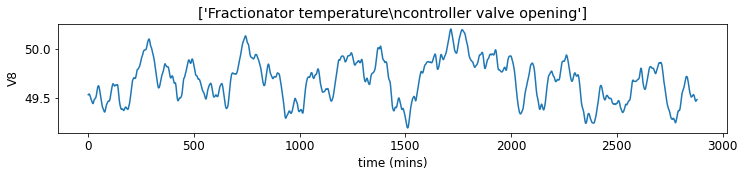

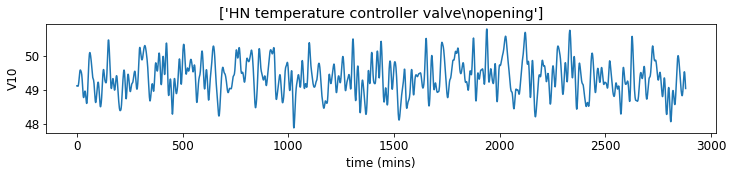

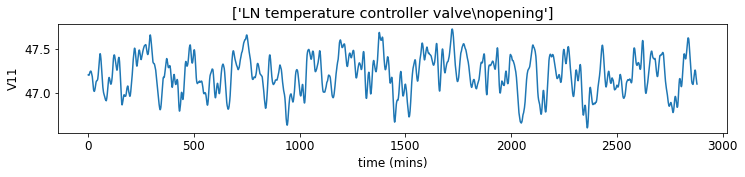

In [9]:
for n,i in enumerate(df_stableFeedFlow.columns):
    plt.figure(figsize=(12,2))
    plt.plot(df_stableFeedFlow[i])
    plt.xlabel('time (mins)')
    plt.ylabel(i)
    plt.title(df[df['Symbol']==i]['Description'].values)
    plt.show()

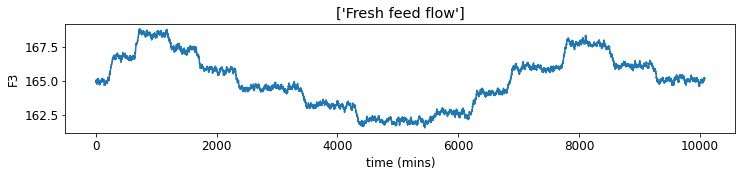

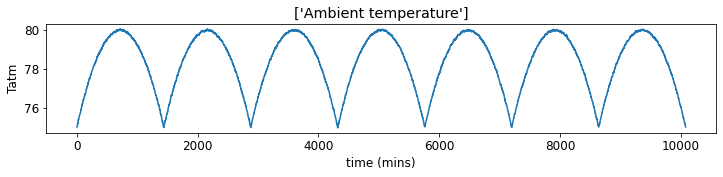

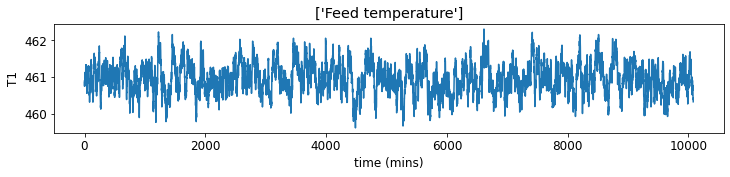

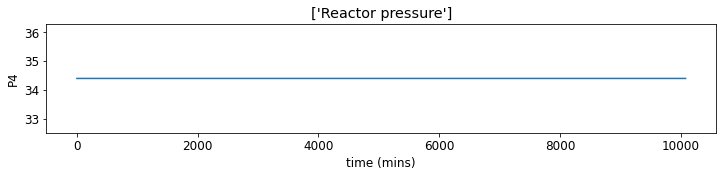

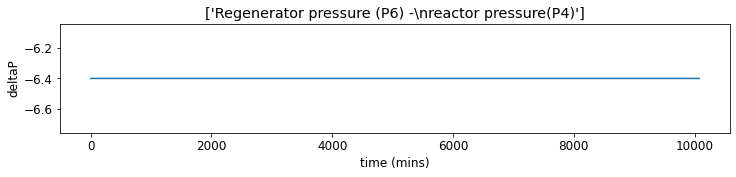

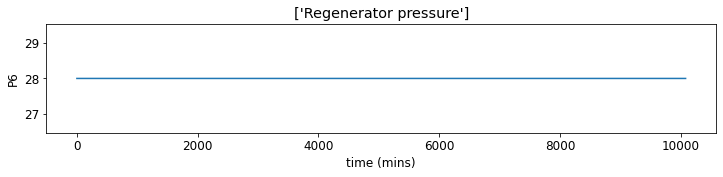

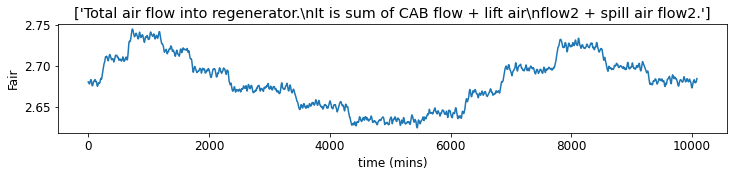

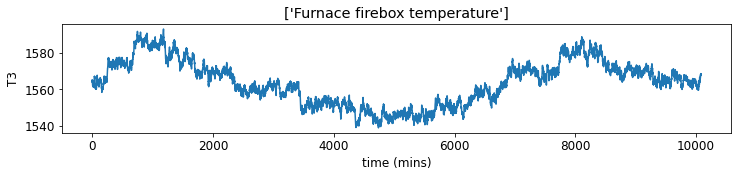

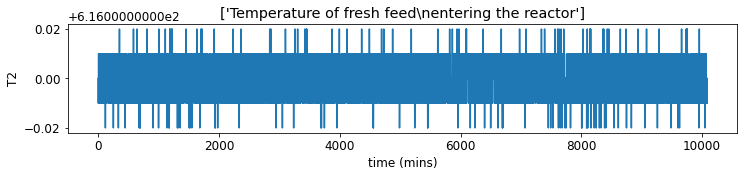

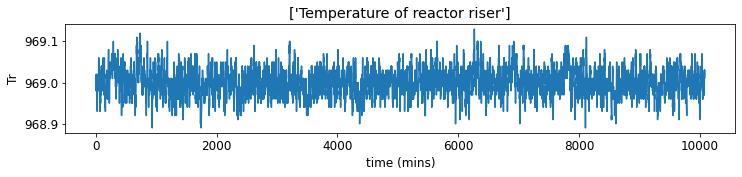

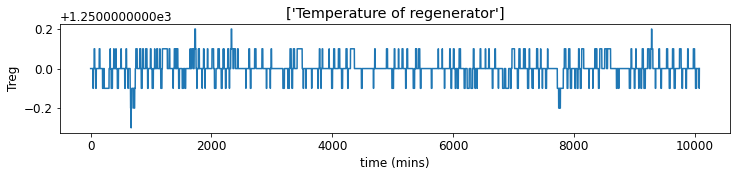

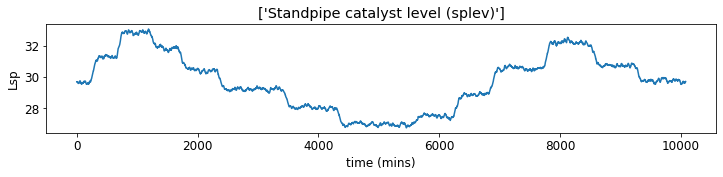

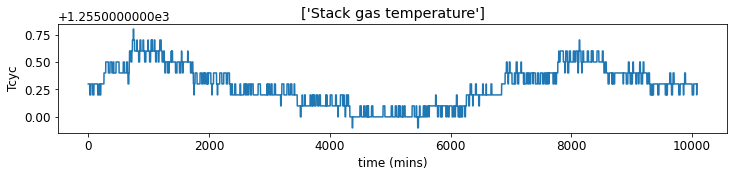

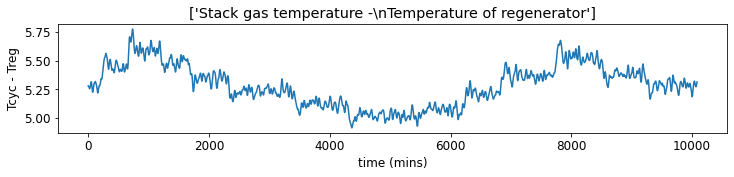

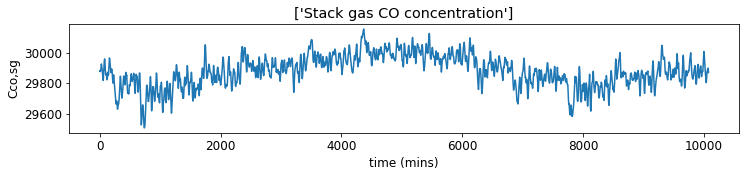

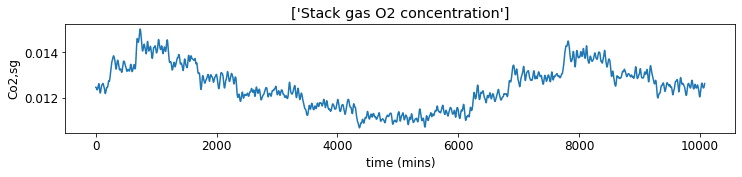

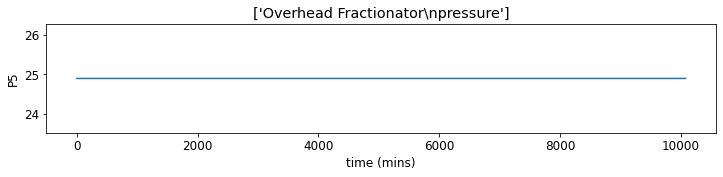

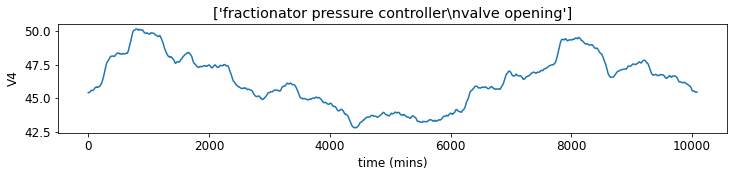

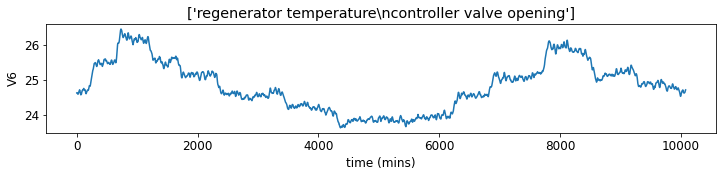

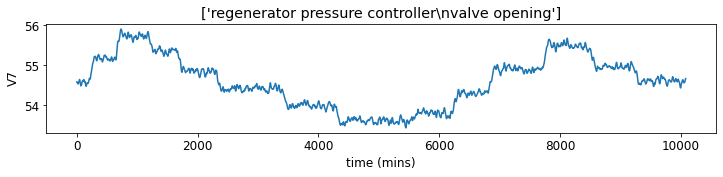

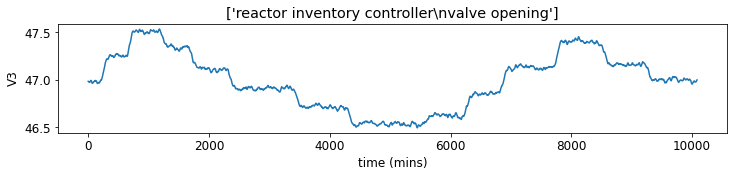

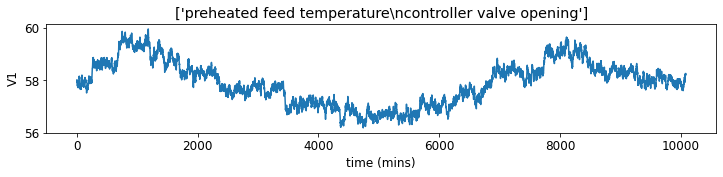

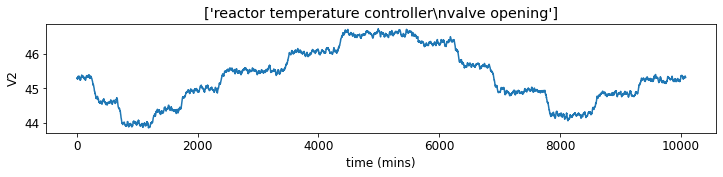

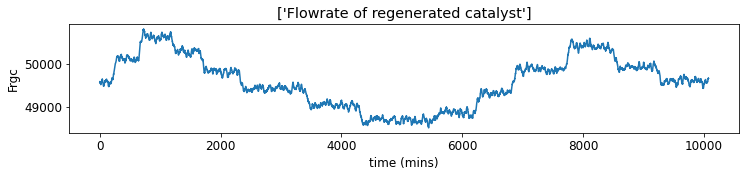

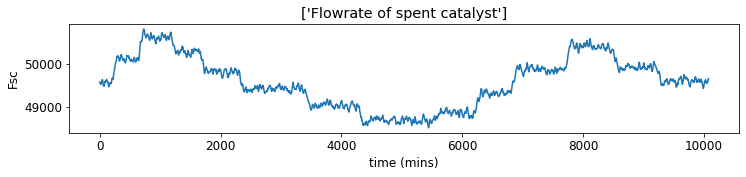

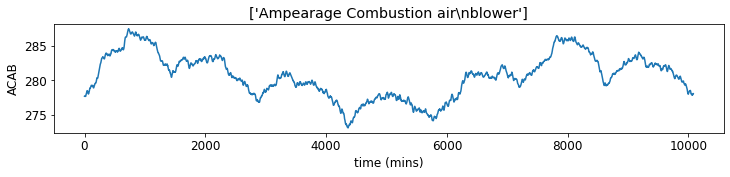

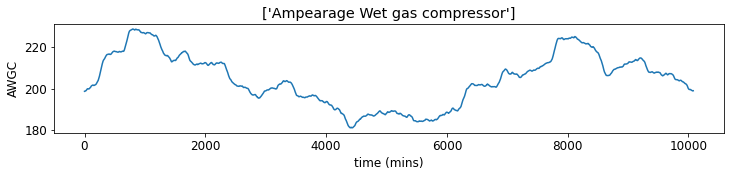

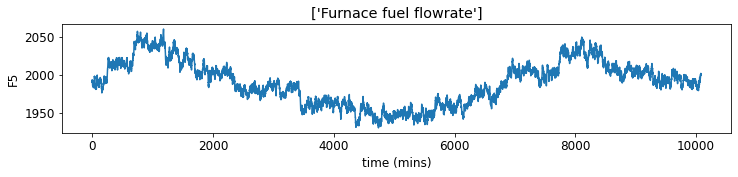

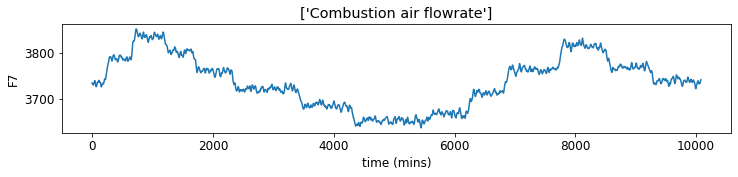

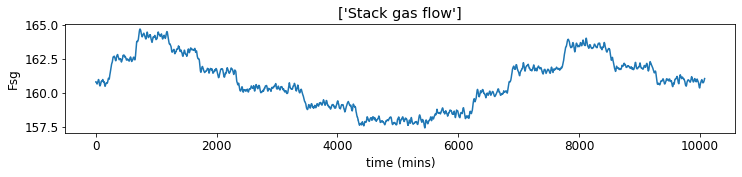

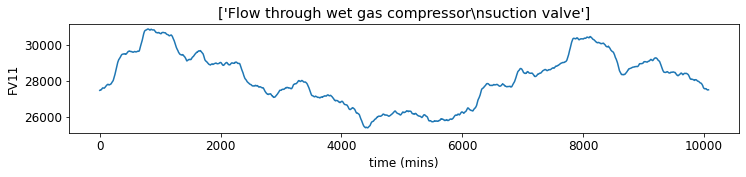

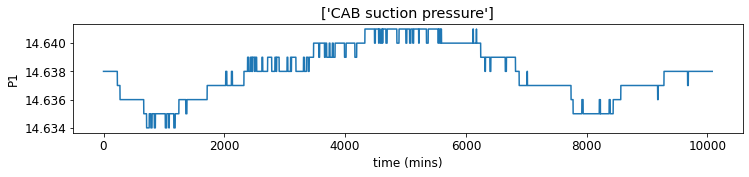

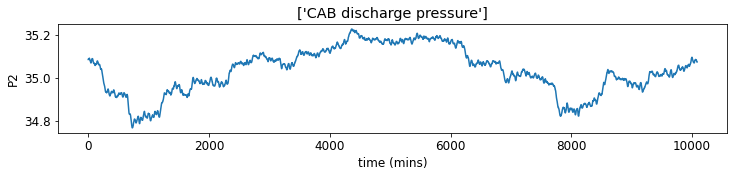

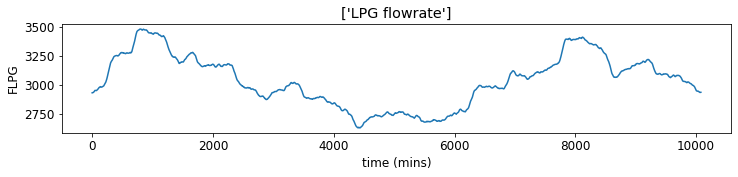

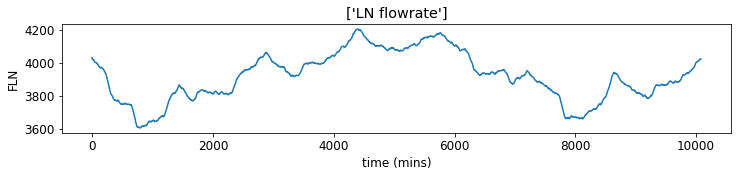

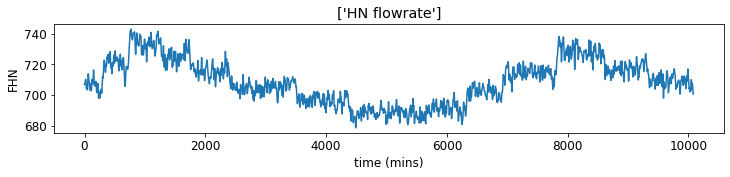

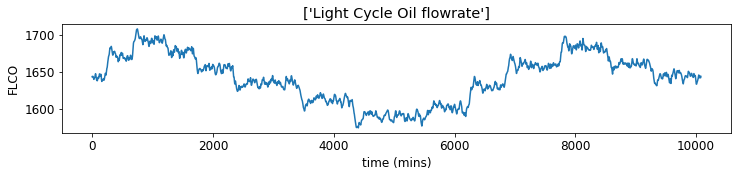

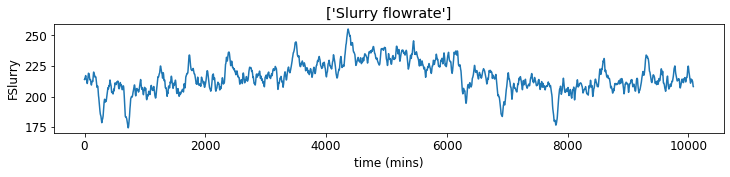

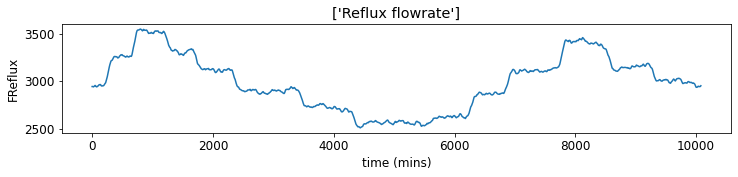

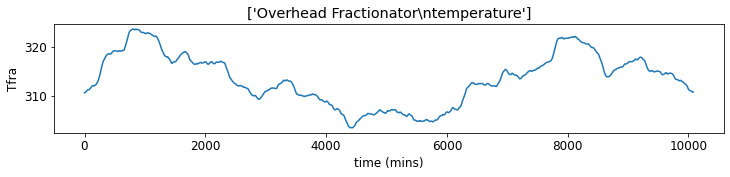

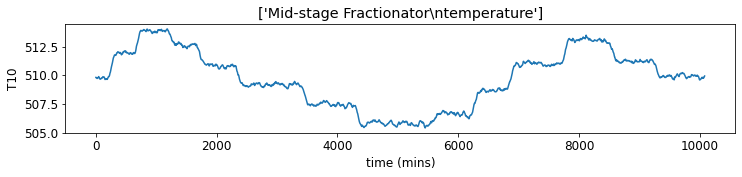

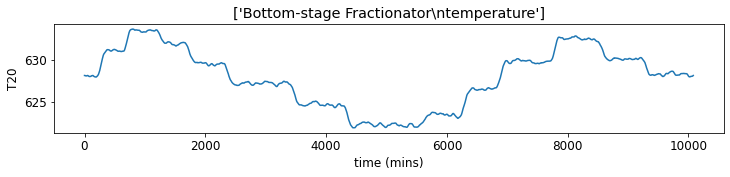

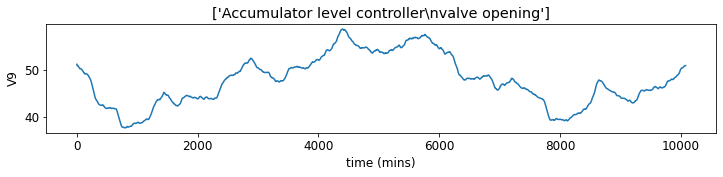

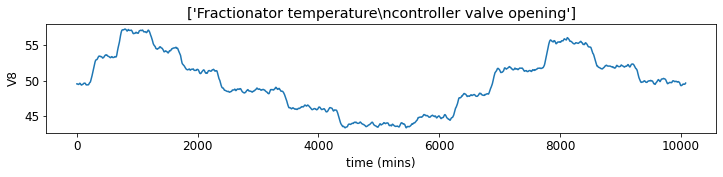

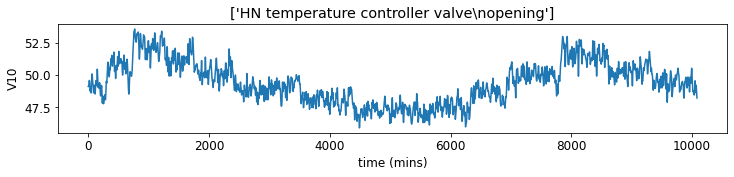

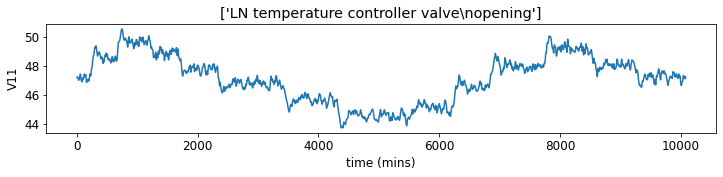

In [10]:
for n,i in enumerate(df_varyingFeedFlow.columns):
    plt.figure(figsize=(12,2))
    plt.plot(df_varyingFeedFlow[i])
    plt.xlabel('time (mins)')
    plt.ylabel(i)
    plt.title(df[df['Symbol']==i]['Description'].values)
    plt.show()

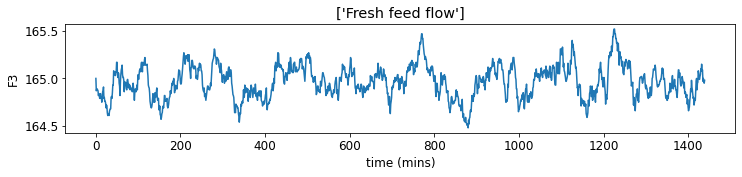

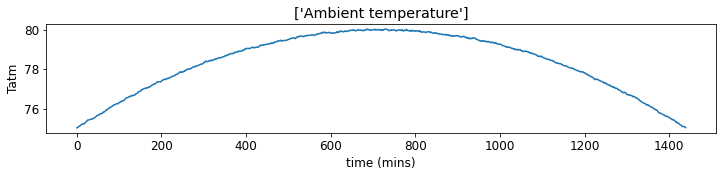

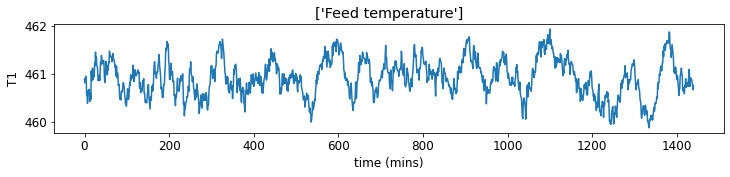

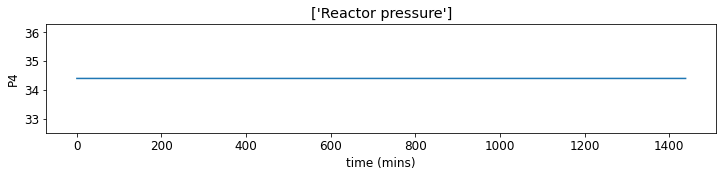

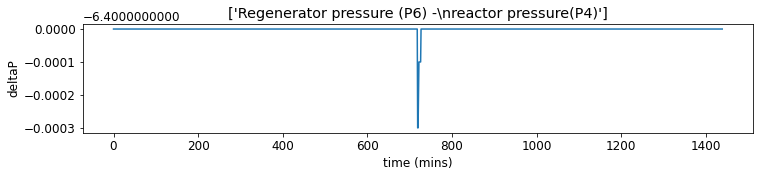

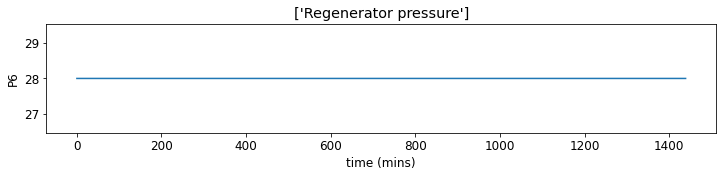

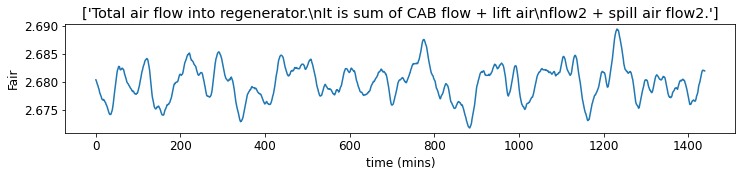

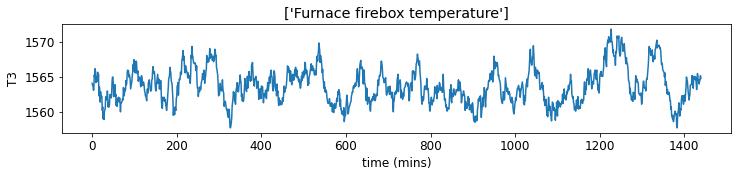

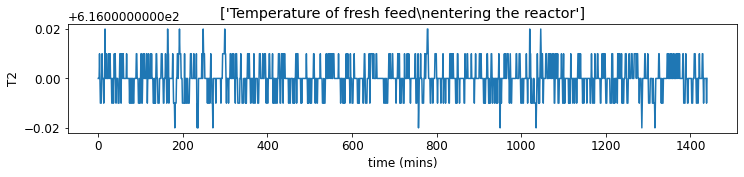

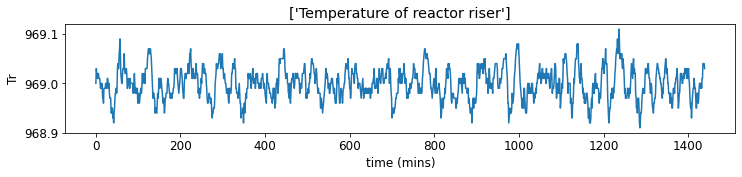

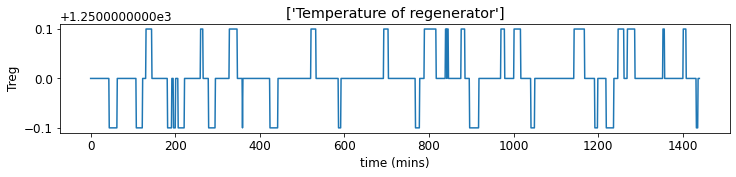

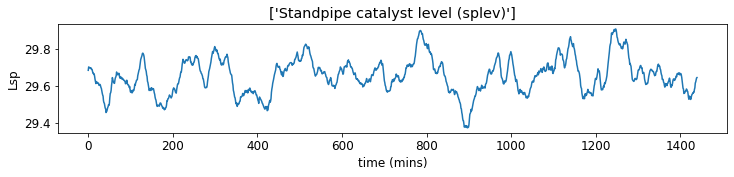

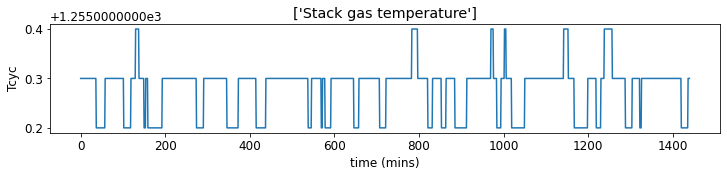

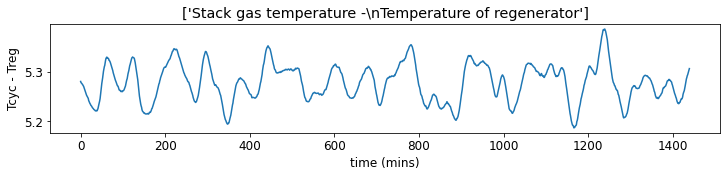

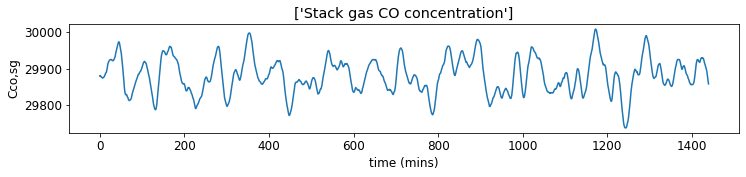

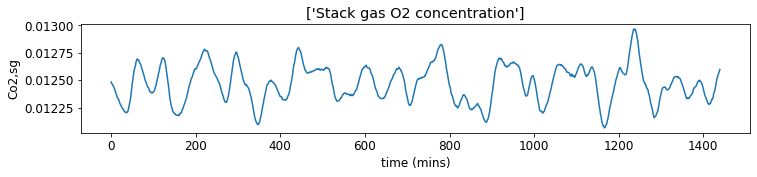

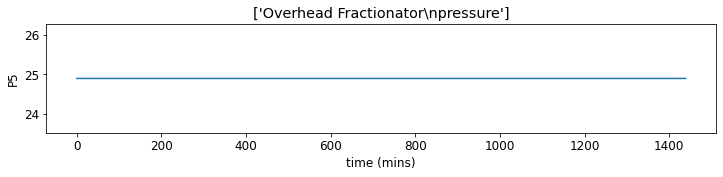

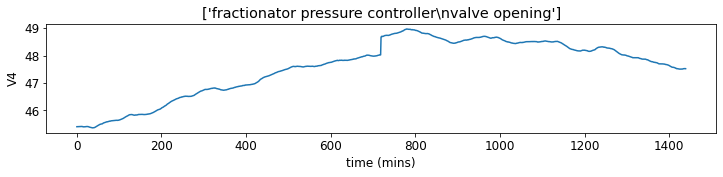

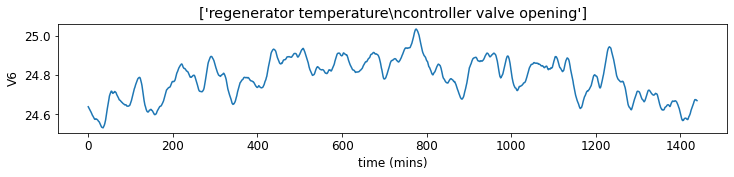

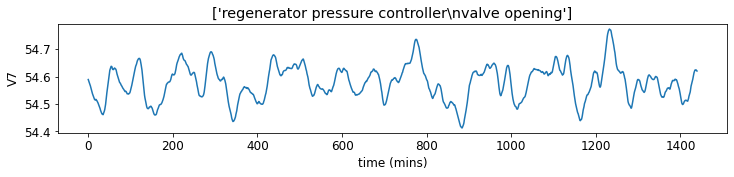

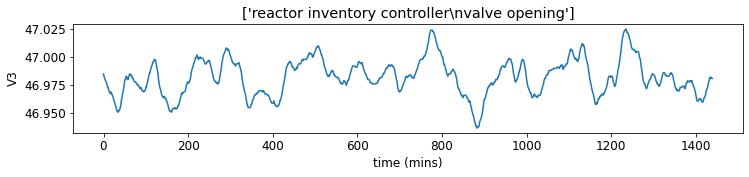

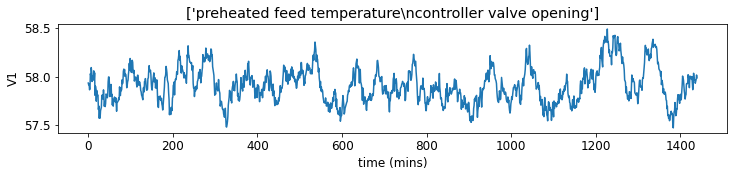

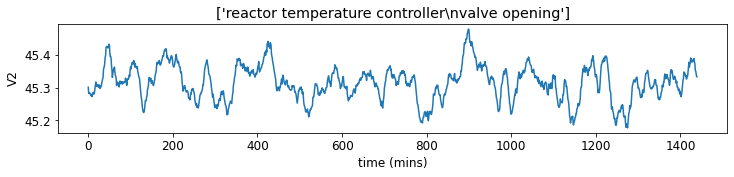

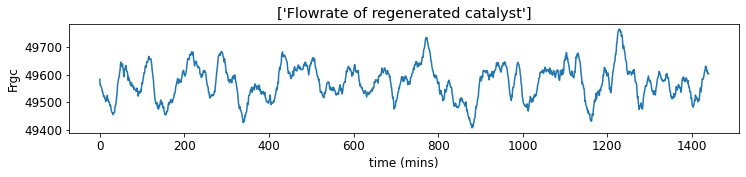

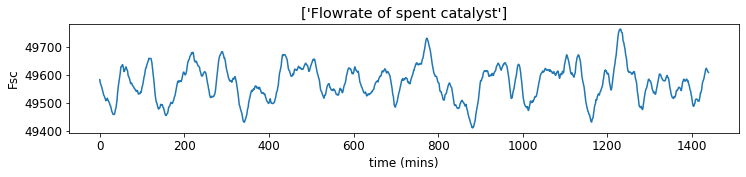

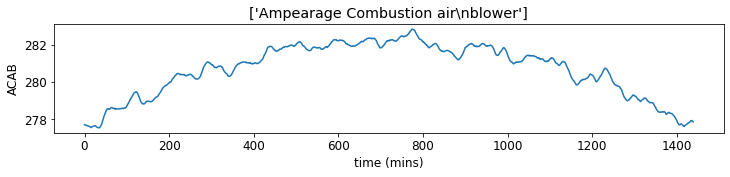

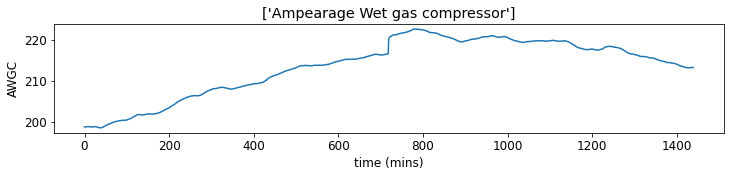

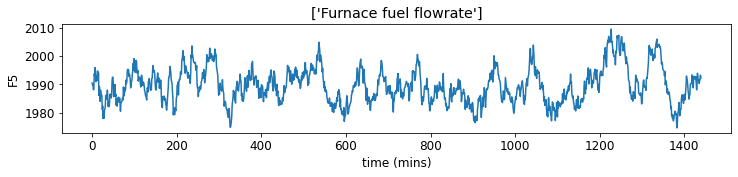

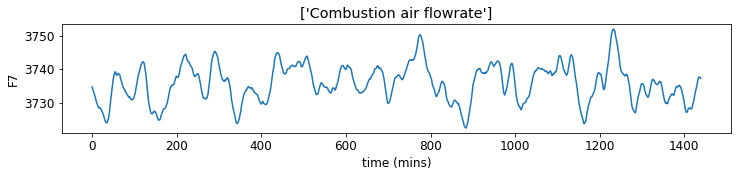

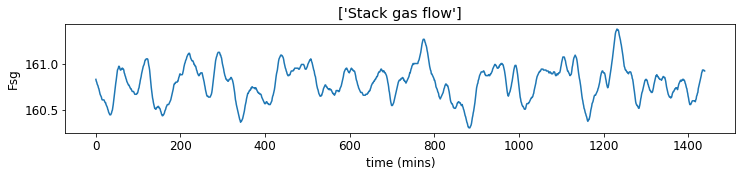

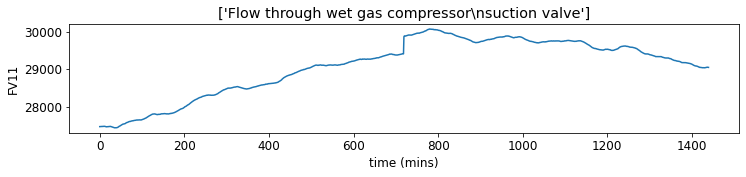

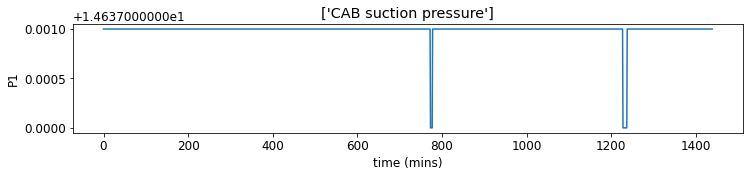

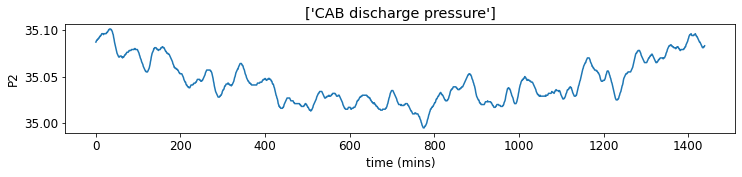

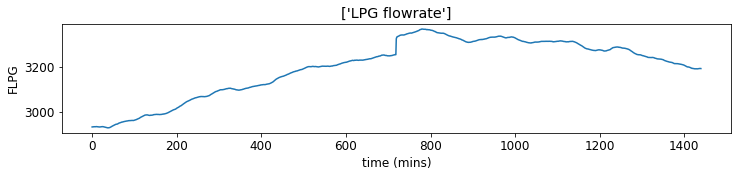

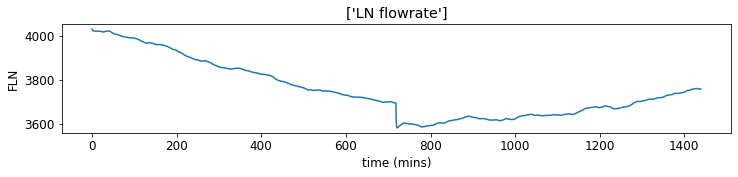

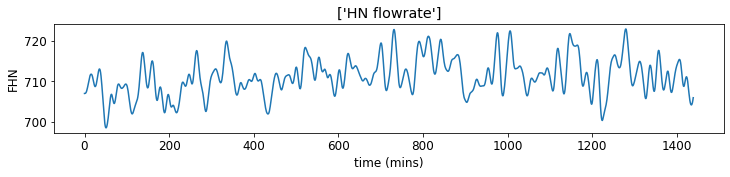

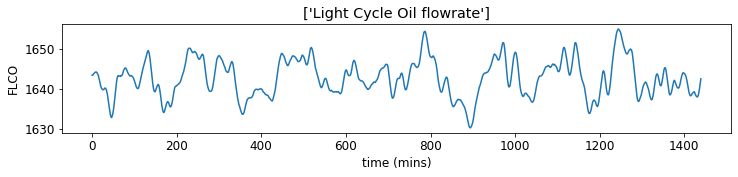

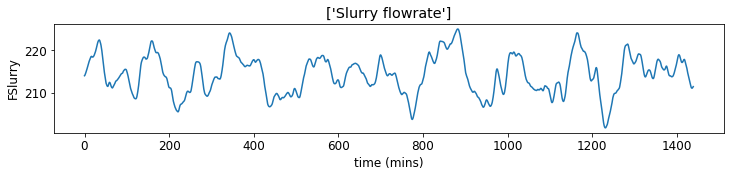

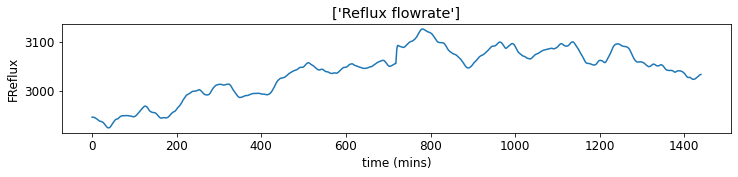

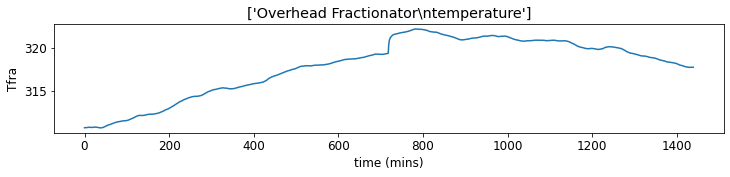

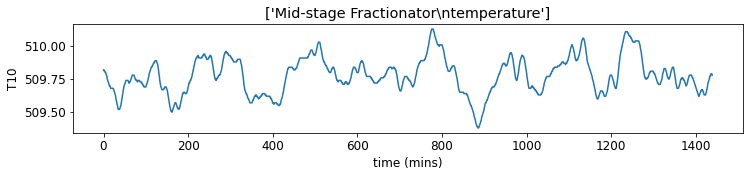

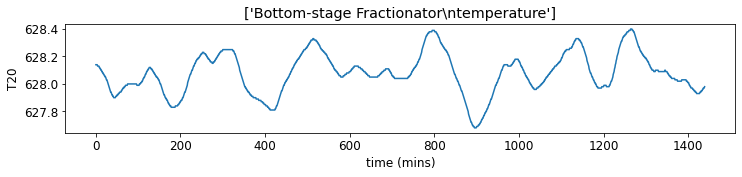

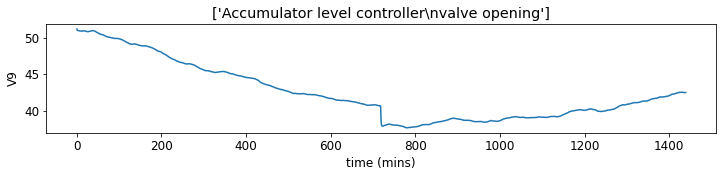

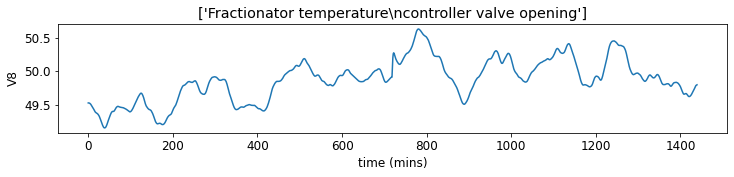

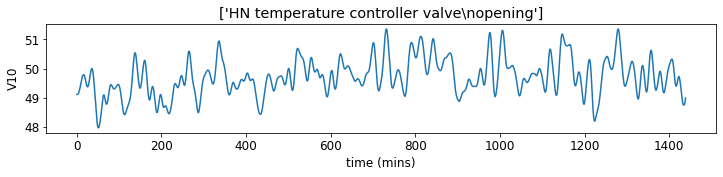

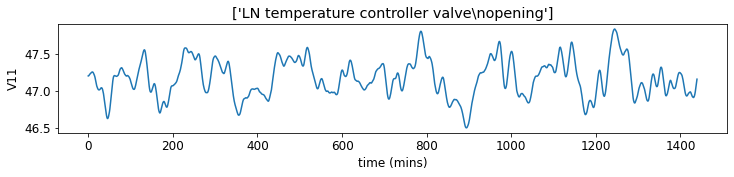

In [11]:
for n,i in enumerate(df_condEff_decrease.columns):
    plt.figure(figsize=(12,2))
    plt.plot(df_condEff_decrease[i])
    plt.xlabel('time (mins)')
    plt.ylabel(i)
    plt.title(df[df['Symbol']==i]['Description'].values)
    plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
ss = StandardScaler()
pca = PCA()

In [13]:
X = ss.fit_transform(df_stableFeedFlow)
X_pca = pca.fit_transform(X)

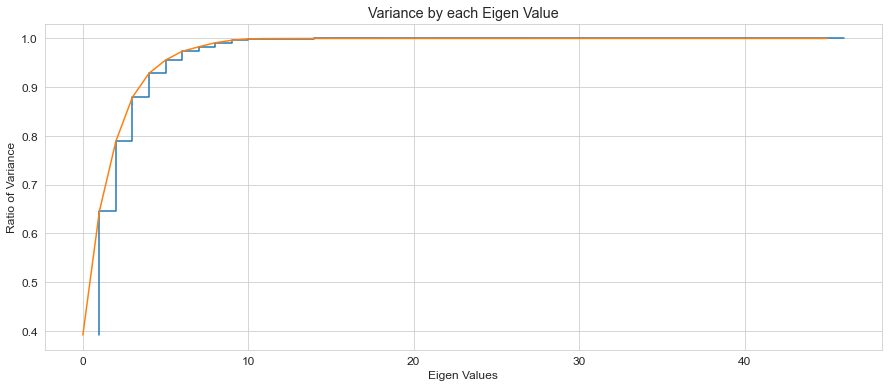

In [14]:
plt.figure(figsize=(15,6))
sns.set_style('whitegrid')
sns.lineplot(x=list(range(1,47)), y=np.cumsum(pca.explained_variance_ratio_), drawstyle='steps-pre')
sns.lineplot(x=list(range(0,46)),y=np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Eigen Values')
plt.ylabel('Ratio of Variance')
plt.title('Variance by each Eigen Value')
plt.show()

In [15]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)

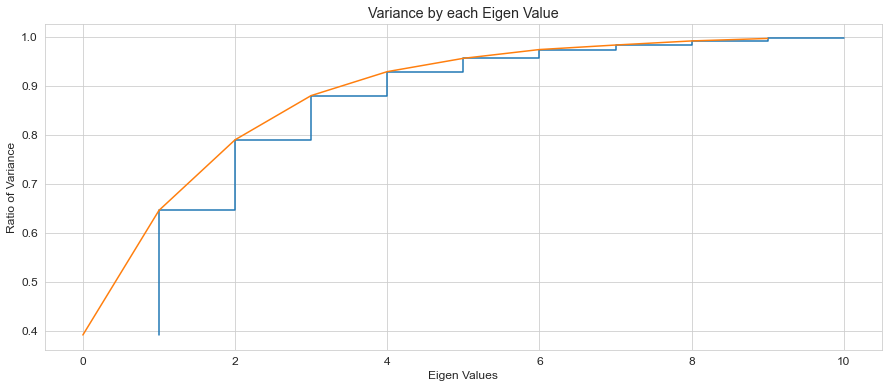

In [16]:
plt.figure(figsize=(15,6))
sns.set_style('whitegrid')
sns.lineplot(x=list(range(1,11)), y=np.cumsum(pca.explained_variance_ratio_), drawstyle='steps-pre')
sns.lineplot(x=list(range(0,10)),y=np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Eigen Values')
plt.ylabel('Ratio of Variance')
plt.title('Variance by each Eigen Value')
plt.show()

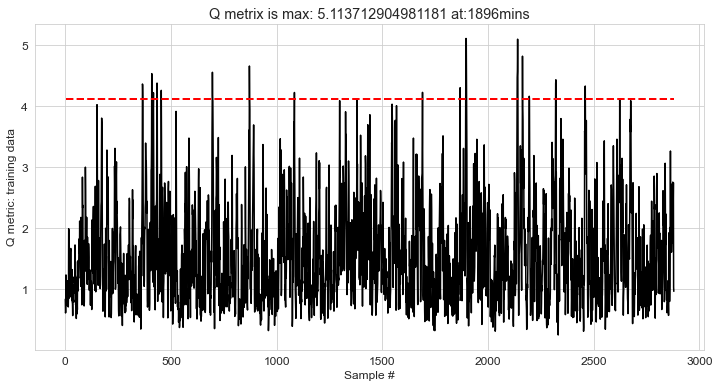

In [17]:
X_reconstructed = np.dot(X_pca,pca.components_)
error_pca = X-X_reconstructed
Q_train = np.sum(np.abs(error_pca),axis=1)
Q_CL = np.percentile(Q_train,99)
# Q_train plot with CL
plt.figure()
plt.plot(Q_train, color='black')
plt.plot([1,len(Q_train)],[Q_CL,Q_CL], linestyle='--',color='red', linewidth=2)
plt.xlabel('Sample #')
plt.ylabel('Q metric: training data')
plt.title(f'Q metrix is max: {Q_train.max()} at:{Q_train.argmax()}mins')
plt.show()

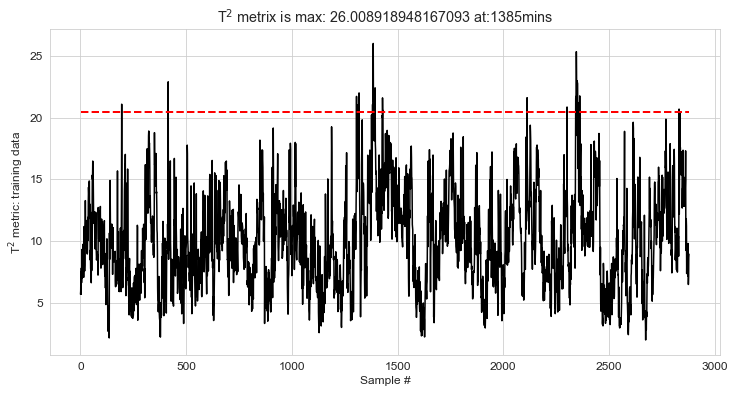

In [18]:
lambda_ = np.diag(pca.explained_variance_)
lambda_inv = np.linalg.inv(lambda_)
T_train = np.zeros(X_pca.shape[0])
for i in range(X_pca.shape[0]):
    T_train[i] = np.dot(np.dot(X_pca[i],lambda_inv),X_pca[i].T)
T_CL = np.percentile(T_train,99)
# T2_train plot with CL
plt.figure()
plt.plot(T_train, color='black')
plt.plot([1,len(T_train)],[T_CL,T_CL], linestyle='--',color='red', linewidth=2)
plt.xlabel('Sample #')
plt.ylabel('T$^2$ metric: training data')
plt.title(f'T$^2$ metrix is max: {np.array(T_train).max()} at:{np.array(T_train).argmax()}mins')
plt.show()

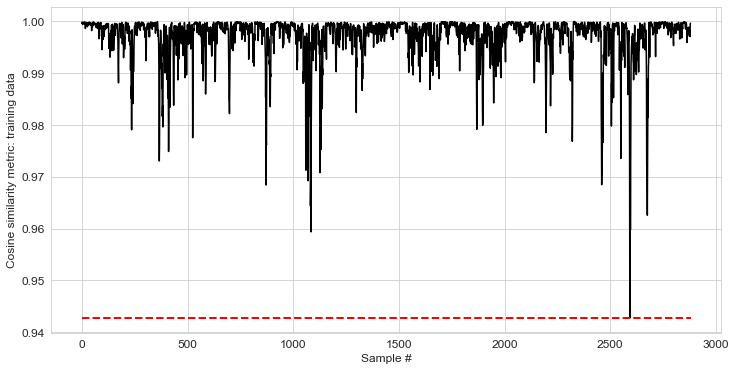

In [19]:
cosine = []
ed = []
for i in range(X.shape[0]):
    v1 = X[i]
    v2 = np.dot(X_pca,pca.components_)[i]
    cosine.append(np.dot(v1,v2)/(np.linalg.norm(v1)*np.linalg.norm(v2)))
    ed.append(np.linalg.norm(v1 - v2))
C_CL = np.min(cosine)
E_CL = np.percentile(ed,99)
# pd.Series(ed).plot(color='black')
# plt.plot([1,len(ed)],[E_CL,E_CL], linestyle='--',color='red', linewidth=2)
# plt.show()
pd.Series(cosine).plot(color='black')
plt.plot([1,len(cosine)],[C_CL,C_CL], linestyle='--',color='red', linewidth=2)
plt.xlabel('Sample #')
plt.ylabel('Cosine similarity metric: training data')
plt.show()

In [20]:
Q_CL,T_CL,C_CL,E_CL

(4.123113215519077, 20.424350352568826, 0.9427550112367163, 0.9281694746755791)

In [21]:
def Q_test(X,X_pca,pca_components_,Q_CL):
    X_reconstructed = np.dot(X_pca,pca_components_)
    error = X-X_reconstructed
    Q_train = np.sum(np.abs(error),axis=1)
    # Q_train plot with CL
    plt.figure()
    plt.plot(Q_train, color='black')
    plt.plot([1,len(Q_train)],[Q_CL,Q_CL], linestyle='--',color='red', linewidth=2)
    plt.xlabel('Sample #')
    plt.ylabel('Q metric: training data')
    plt.title(f'Q metrix is max: {Q_train.max()} at:{Q_train.argmax()}mins')
    plt.show()
    return error

In [22]:
def T_test(X_pca,explained_variance_,TCL):
    lambda_ = np.diag(pca.explained_variance_)
    lambda_inv = np.linalg.inv(lambda_)
    T_train = np.zeros(X_pca.shape[0])
    for i in range(X_pca.shape[0]):
        T_train[i] = np.dot(np.dot(X_pca[i],lambda_inv),X_pca[i].T)
    # T2_train plot with CL
    plt.figure()
    plt.plot(T_train, color='black')
    plt.plot([1,len(T_train)],[T_CL,T_CL], linestyle='--',color='red', linewidth=2)
    plt.xlabel('Sample #')
    plt.ylabel('T$^2$ metric: training data')
    plt.title(f'T$^2$ metrix is max: {np.array(T_train).max()} at:{np.array(T_train).argmax()}mins')
    plt.show()

In [23]:
def cosine(X,X_transformed,pca_components_,C_CL,E_CL):
    cosine = []
    ed = []
    for i in range(X.shape[0]):
        v1 = X[i]
        v2 = np.dot(X_transformed,pca_components_)[i]
        cosine.append(np.dot(v1,v2)/(np.linalg.norm(v1)*np.linalg.norm(v2)))
        ed.append(np.linalg.norm(v1 - v2))
#     pd.Series(ed).plot(color='black')
#     plt.plot([1,len(ed)],[E_CL,E_CL], linestyle='--',color='red', linewidth=2)
#     plt.xlabel('Sample #')
#     plt.ylabel('Eucledian Distance metric: training data')
#     plt.show()
    pd.Series(cosine).plot(color='black')
    plt.plot([1,len(cosine)],[C_CL,C_CL], linestyle='--',color='red', linewidth=2)
    plt.xlabel('Sample #')
    plt.ylabel('Cosine similarity metric: training data')
    plt.show()

In [24]:
X = ss.transform(df_varyingFeedFlow)
X_test = pca.transform(X)

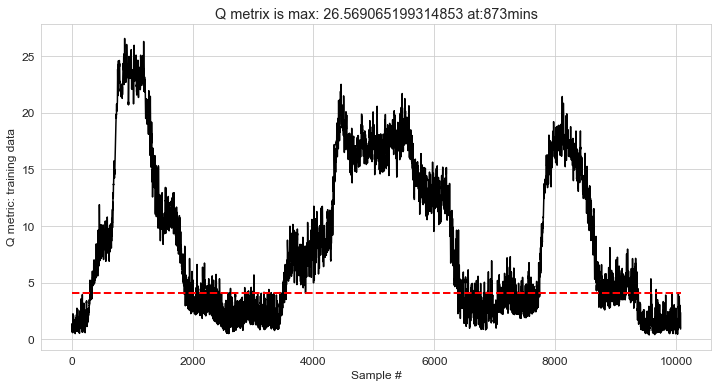

In [25]:
error = Q_test(X,X_test,pca.components_,Q_CL)

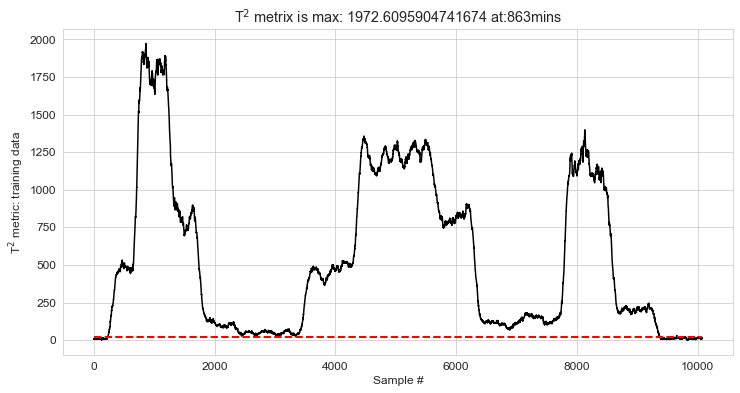

In [26]:
T_test(X_test,pca.explained_variance_,T_CL)

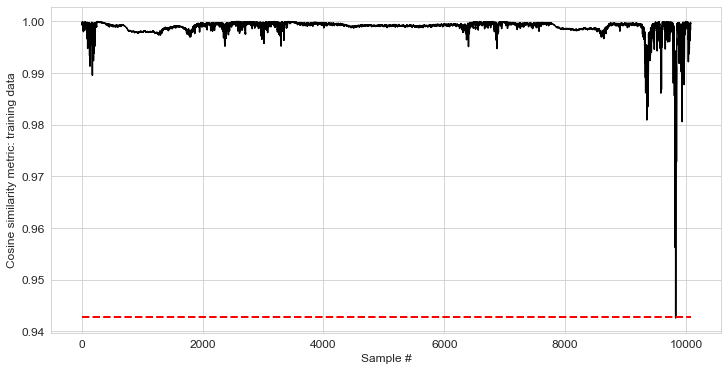

In [27]:
cosine(X,X_test,pca.components_,C_CL,E_CL)

In [28]:
X = ss.transform(df_condEff_decrease)
X_test = pca.transform(X)

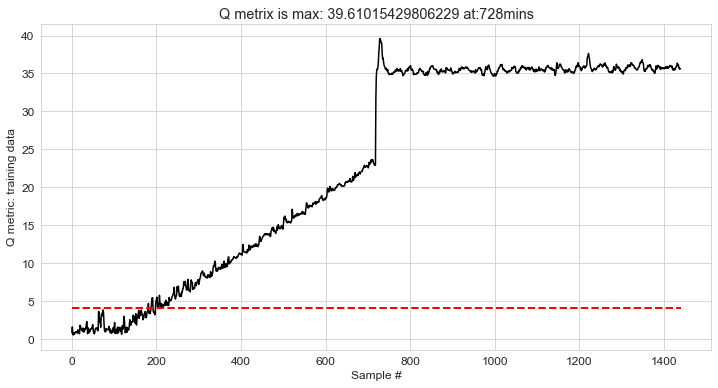

In [29]:
error = Q_test(X,X_test,pca.components_,Q_CL)

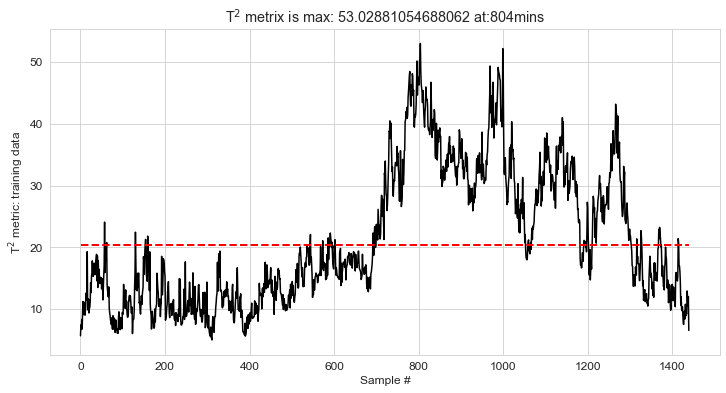

In [30]:
T_test(X_test,pca.explained_variance_,T_CL)

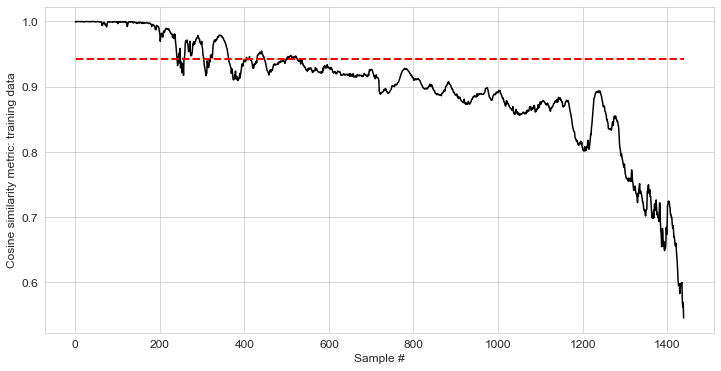

In [31]:
cosine(X,X_test,pca.components_,C_CL,E_CL)

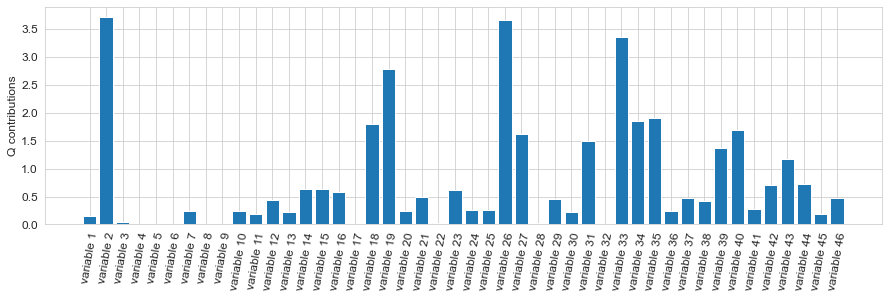

In [32]:
#%% Q contribution
sample = 800

error_test_sample = error[sample]
Q_contri = np.abs(error_test_sample) # *error_test_sample # vector of contributions

plt.figure(figsize=[15,4])
plt.bar(['variable ' + str((i+1)) for i in range(len(Q_contri))], Q_contri)
plt.xticks(rotation = 80)
plt.ylabel('Q contributions')
plt.show()

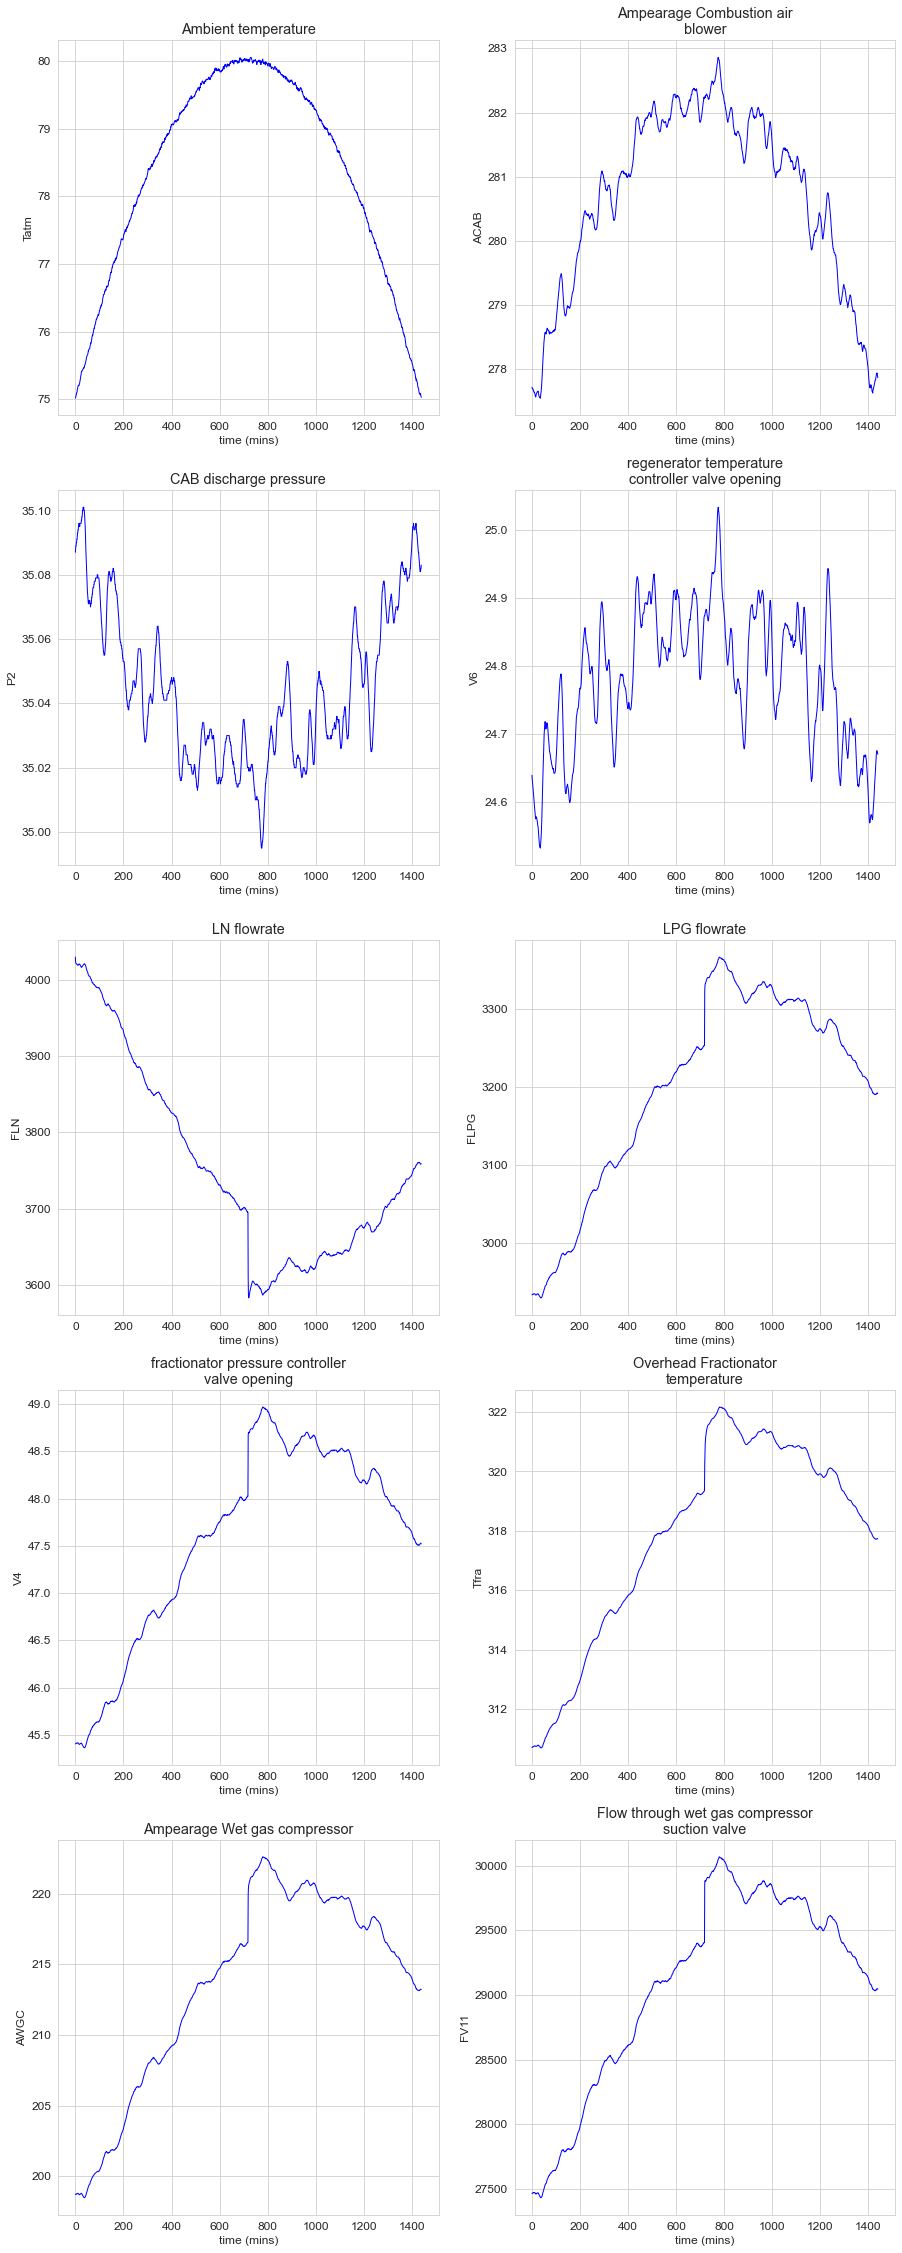

In [33]:
plt.figure(figsize=(15,40))
for i,n in enumerate(np.argsort(Q_contri)[:-11:-1]):
    plt.subplot(5,2,i+1)
    plt.plot(df_condEff_decrease.iloc[:,n],'blue', linewidth=1)
    plt.xlabel('time (mins)')
    plt.ylabel(df['Symbol'][n])
    plt.title(df['Description'][n])
    plt.show